<a href="https://colab.research.google.com/github/giggsy1106/DATA-622-Phishing-Project/blob/main/622_NLP_Phishing%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP-Based Phishing Email Classification System**

In [ ]:
# Import required libraries for data handling, preprocessing, modeling, and evaluation

import re                         # for text cleaning using regular expressions
import pandas as pd              # for handling dataset
import matplotlib.pyplot as plt  # for plotting confusion matrix

# Machine Learning / NLP libraries
from sklearn.model_selection import train_test_split   # to split dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # to convert text to numeric features
from sklearn.linear_model import LogisticRegression     # classification model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report  # evaluation

# This ensures plots display inside Jupyter/Colab
%matplotlib inline


In [ ]:
# Load dataset from CSV file
# The dataset should have two columns:
# 'text' -> email content
# 'label' -> 1 = spam/phishing, 0 = legitimate email

df = pd.read_csv("emails.csv")

# Display first 5 rows of dataset to understand structure
df.head()


,text,label
0,"Dear user, your account has been suspended. Cl...",1
1,Congratulations! You have won a lottery. Claim...,1
2,Urgent: update your bank details to avoid acco...,1
3,Limited time offer! Buy now and get 50% discount,1
4,Your PayPal account needs verification. Login ...,1


In [ ]:
# Function to clean and normalize email text
def clean_email(text: str) -> str:

    # Convert input to string (to avoid errors)
    text = str(text)

    # Remove HTML tags (if emails contain HTML formatting)
    text = re.sub(r"<[^>]+>", " ", text)

    # Replace URLs with a standard token 'URL'
    # This helps model learn link patterns instead of exact links
    text = re.sub(r"http\S+|www\.\S+", " URL ", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Convert text to lowercase for consistency
    return text.lower()

# Apply cleaning function to all emails
df["clean_text"] = df["text"].apply(clean_email)

# Show cleaned text
df[["text", "clean_text", "label"]].head()


,text,clean_text,label
0,"Dear user, your account has been suspended. Cl...","dear user, your account has been suspended. cl...",1
1,Congratulations! You have won a lottery. Claim...,congratulations! you have won a lottery. claim...,1
2,Urgent: update your bank details to avoid acco...,urgent: update your bank details to avoid acco...,1
3,Limited time offer! Buy now and get 50% discount,limited time offer! buy now and get 50% discount,1
4,Your PayPal account needs verification. Login ...,your paypal account needs verification. login ...,1


In [ ]:
# Separate features (X) and labels (y)
X = df["clean_text"]   # input text
y = df["label"]        # output labels (spam or ham)

# Split dataset into training and testing sets
# 80% training, 20% testing
# stratify=y ensures both classes are balanced in split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print sizes of split datasets
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 12
Testing samples: 3


In [ ]:
# Convert text into numerical vectors using TF-IDF
# TF-IDF gives higher weight to important words

tfidf = TfidfVectorizer(
    stop_words="english",   # remove common words like 'the', 'is'
    ngram_range=(1, 2),     # use single words and pairs of words (bigrams)
    max_features=30000      # limit features for efficiency
)

# Fit on training data and transform both train and test data
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Print shape of resulting matrices
print("TF-IDF Train shape:", X_train_vec.shape)
print("TF-IDF Test shape:", X_test_vec.shape)


TF-IDF Train shape: (12, 115)
TF-IDF Test shape: (3, 115)


In [ ]:
# Print classification report
# It shows precision, recall, F1-score, and support

print("Classification Report:\n")
print(classification_report(y_test, pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Confusion Matrix:
 [[1 0]
 [0 2]]


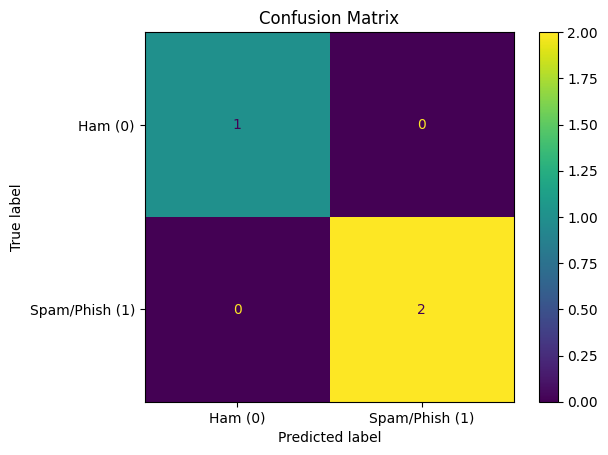

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, pred)

# Print confusion matrix values
print("Confusion Matrix:\n", cm)

# Plot confusion matrix for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Ham (0)", "Spam/Phish (1)"])

disp.plot()

# Add title
plt.title("Confusion Matrix")

# Show plot
plt.show()


In [ ]:
# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Get model coefficients
# Positive values -> spam/phishing
# Negative values -> legitimate emails
coefs = model.coef_[0]

# Get top 10 spam-indicative words
top_spam = coefs.argsort()[-10:][::-1]

# Get top 10 ham-indicative words
top_ham = coefs.argsort()[:10]

print("Top Spam/Phishing Indicators:")
print([feature_names[i] for i in top_spam])

print("\nTop Ham Indicators:")
print([feature_names[i] for i in top_ham])


Top Spam/Phishing Indicators:
['link', 'account', 'password', 'iphone clicking', 'clicking link', 'clicking', 'free iphone', 'free', 'iphone', 'win']

Top Ham Indicators:
['attached', 'project', 'let', 'invoice attached', 'invoice', 'attached review', 'review', 'deadline', 'reminder', 'reminder submit']


Loaded 15 emails | Spam: 8 | Legit: 7
Features: 7 | Train: 12 | Test: 3
Logistic Regression    | Test: 0.667 | CV: 0.633
Random Forest          | Test: 0.667 | CV: 0.700
Linear SVM             | Test: 0.667 | CV: 0.633
Naive Bayes            | Test: 0.667 | CV: 0.833

Best: Logistic Regression (0.667)
              precision    recall  f1-score   support

  Legitimate       0.00      0.00      0.00         1
    Phishing       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


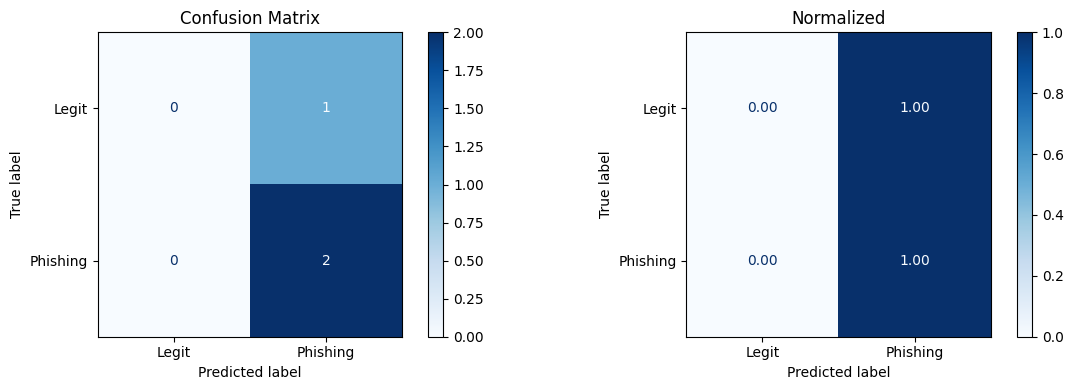

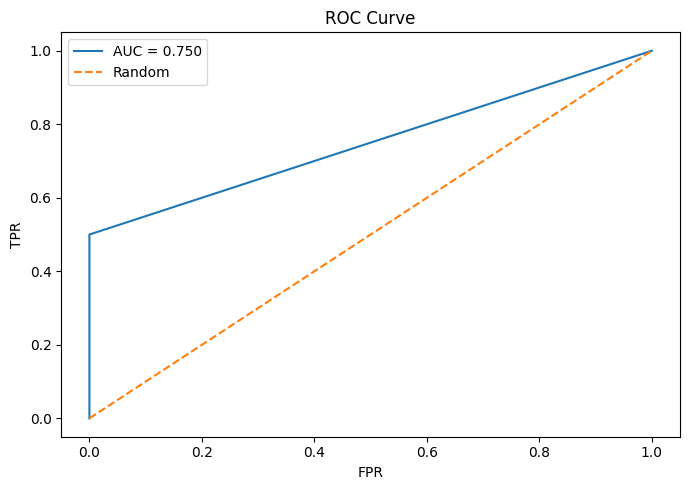

Top Phishing words: ['link', 'password', 'account', 'update', 'project', 'let', 'attached']
Top Legit words:    ['attached', 'let', 'project', 'update', 'account', 'password', 'link']

Click here to verify your account: http://fake-bank.com/login
→ {'label': 'PHISHING', 'phishing_prob': '62.54%', 'legit_prob': '37.46%'}

Meeting scheduled for tomorrow at 2 PM. Please confirm.
→ {'label': 'PHISHING', 'phishing_prob': '50.00%', 'legit_prob': '50.00%'}

You've WON a FREE iPhone! Claim now: http://prize.com
→ {'label': 'PHISHING', 'phishing_prob': '50.00%', 'legit_prob': '50.00%'}

Model saved to phishing_model.pkl


In [5]:
import re, joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, roc_curve, auc, accuracy_score)


# CSV must have columns: 'text' (email body), 'label' (1=phishing, 0=legit)
df = pd.read_csv("emails (1).csv")
print(f"Loaded {len(df)} emails | Spam: {df['label'].sum()} | Legit: {(df['label']==0).sum()}")


def clean(text: str) -> str:
    text = str(text)
    text = re.sub(r"<[^>]+>", " ", text)           # strip HTML
    text = re.sub(r"http\S+|www\.\S+", " URL ", text)  # replace URLs
    text = re.sub(r"\S+@\S+", " EMAIL ", text)     # replace emails
    text = re.sub(r"\b\d{3}[-.]?\d{3}[-.]?\d{4}\b", " PHONE ", text)  # phone numbers
    text = re.sub(r"\$[\d,]+(?:\.\d{2})?", " MONEY ", text)  # currency
    text = re.sub(r"[^a-zA-Z\s!?.,]", " ", text)  # keep letters + basic punct
    return re.sub(r"\s+", " ", text).strip().lower()

df["clean_text"] = df["text"].apply(clean)

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1, 2),
                        max_features=30000, min_df=2, max_df=0.95)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)
print(f"Features: {X_train_vec.shape[1]} | Train: {X_train_vec.shape[0]} | Test: {X_test_vec.shape[0]}")


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest":       RandomForestClassifier(n_estimators=100, random_state=42),
    "Linear SVM":          LinearSVC(max_iter=1000, random_state=42),
    "Naive Bayes":         MultinomialNB(),
}

results, trained = {}, {}
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_vec))
    cv  = cross_val_score(model, X_train_vec, y_train, cv=5).mean()
    results[name] = acc
    trained[name] = model
    print(f"{name:22s} | Test: {acc:.3f} | CV: {cv:.3f}")

best_name  = max(results, key=results.get)
best_model = trained[best_name]
print(f"\nBest: {best_name} ({results[best_name]:.3f})")


pred       = best_model.predict(X_test_vec)
pred_proba = best_model.predict_proba(X_test_vec) if hasattr(best_model, "predict_proba") else None

print(classification_report(y_test, pred, target_names=["Legitimate", "Phishing"]))

# Confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred),
                       display_labels=["Legit", "Phishing"]).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Confusion Matrix")

cm_norm = confusion_matrix(y_test, pred).astype(float)
cm_norm /= cm_norm.sum(axis=1, keepdims=True)
ConfusionMatrixDisplay(cm_norm, display_labels=["Legit", "Phishing"]).plot(
    ax=axes[1], cmap="Blues", values_format=".2f")
axes[1].set_title("Normalized")
plt.tight_layout(); plt.show()

# ROC curve (only for models with predict_proba)
if pred_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1],"--", label="Random")
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve")
    plt.legend(); plt.tight_layout(); plt.show()


if hasattr(best_model, "coef_"):
    coefs    = best_model.coef_[0]
    names    = tfidf.get_feature_names_out()
    top_spam = names[coefs.argsort()[-10:][::-1]]
    top_legit= names[coefs.argsort()[:10]]
    print("Top Phishing words:", list(top_spam))
    print("Top Legit words:   ", list(top_legit))


def predict(text: str) -> dict:
    vec  = tfidf.transform([clean(text)])
    pred = best_model.predict(vec)[0]
    result = {"label": "PHISHING" if pred == 1 else "LEGITIMATE"}

    if hasattr(best_model, "predict_proba"):
        p = best_model.predict_proba(vec)[0]
        result["phishing_prob"] = f"{p[1]:.2%}"
        result["legit_prob"]    = f"{p[0]:.2%}"
    return result

samples = [
    "Click here to verify your account: http://fake-bank.com/login",
    "Meeting scheduled for tomorrow at 2 PM. Please confirm.",
    "You've WON a FREE iPhone! Claim now: http://prize.com",
]
for s in samples:
    print(f"\n{s[:70]}\n→ {predict(s)}")


joblib.dump({"model": best_model, "vectorizer": tfidf}, "phishing_model.pkl")
print("\nModel saved to phishing_model.pkl")